<a href="https://colab.research.google.com/github/jjain0811/Comprehensive-Survey-on-Techniques-of-Topic-Evolution-Mining/blob/main/finaltwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content/drive/My Drive/Research Project 20-21/Datasets/Pulwama Original Tweets")

In [ ]:
#install dependencies
!pip install transformers==4.0.0
!pip install torch==1.7.1
!pip install ktrain



     |████████████████████████████████| 1.4MB 6.3MB/s 
     |████████████████████████████████| 901kB 10.5MB/s 
     |████████████████████████████████| 2.9MB 24.9MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
     |████████████████████████████████| 25.3MB 161kB/s 
     |████████████████████████████████| 6.8MB 42.9MB/s 
     |████████████████████████████████| 983kB 38.0MB/s 
     |████████████████████████████████| 266kB 47.7MB/s 
     |████████████████████████████████| 1.2MB 40.5MB/s 
     |████████████████████████████████| 471kB 46.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=4

In [ ]:
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
predictor_load = ktrain.load_predictor('bert2') #load model

In [ ]:
import json #load overall sentiments of all tweets predicted with bert
with open("tweet_sentiments_bert.json" , "r") as file:
  dict_bert = json.load(file)

In [ ]:
overall_senti = {}
for i in dict_bert:
  dict = {}
  for d in dict_bert[i]:
    try:
      dict[d['sentiment']] += 1
    except:
      dict[d['sentiment']] = 1
  overall_senti[i] = dict

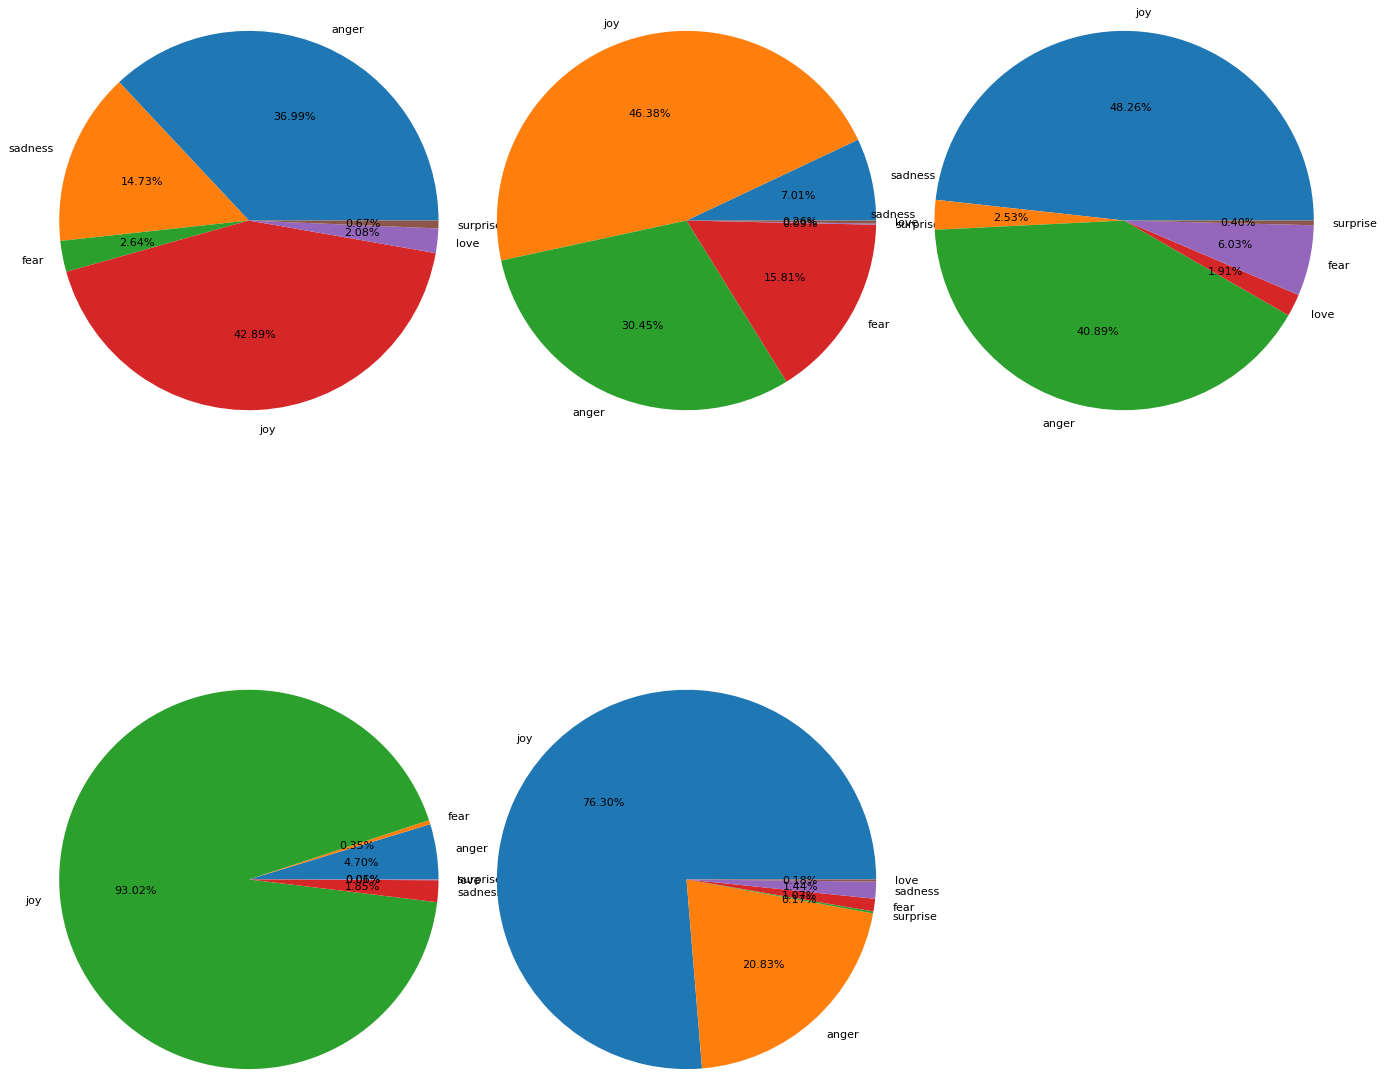

In [ ]:
import matplotlib.pyplot as plt #plot pie chart of dictionary
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
#plot 1:
c = 0
for i in overall_senti:
  c += 1
  langs = overall_senti[i].keys()
  students = overall_senti[i].values()
  plt.subplot(2, 3, c)
  plt.pie(students, labels = langs,autopct='%1.2f%%',radius=1.3)

#plot 2:
# x = np.array([0, 1, 2, 3])
# y = np.array([10, 20, 30, 40])

# plt.subplot(1, 2, 2)
# plt.plot(x,y)

plt.show()

  cluster  anger  sadness   fear    joy  love  surprise
0       0   9642     3841    689  11181   543       174
1       4    239     1581   1038    539     3         9
2       2  24090     1261  20412    951  3009       198
3       3    424       32   8387    167     5         1
4       1   4547     1241     10     64    86        11


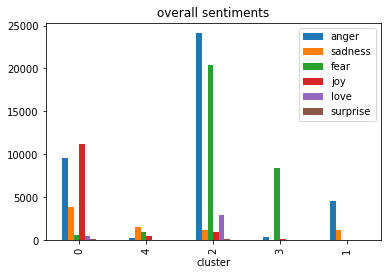

In [ ]:
import matplotlib.pyplot as plt  #plot bar chat if dictionary
import pandas as pd

# create data
li = []
for i in overall_senti:
  lis = [i]
  lis = lis + list(overall_senti[i].values())
  li.append(lis)
columns = ["cluster"] + list(overall_senti['0'].keys())
df = pd.DataFrame(li,
                  columns=columns)
# view data
print(df)

# plot grouped bar chart
df.plot(x='cluster',
        kind='bar',
        stacked=False,
        title='overall sentiments')

In [ ]:
import json #load the hashtag clusters derived from fp growth
with open("hashtag_clusters_fp.json", "r") as file:
  ht = json.load(file)

FileNotFoundError: ignored

In [ ]:
"""
Temporal behaviour
run this to create userwise dictionary for tweets
"""
import re
import datetime
import json
count_user = 0
import numpy as np
dict__ = {}
with open("user_5000-5200_.json", "r") as file: #change filename to run for different filea
  user_data = json.load(file)
  dict = {}
  for i in user_data:
    user = {}
    for tweet in user_data[i]:
      count = np.zeros(6)
      for h in tweet["entities"]["hashtags"]:

        for key in range(len(ht)):
          if h["text"].lower() in ht[str(key)]:
            count[key] += 1
            break
      di = {}
      cluster = np.argmax(count)
      if count[cluster] != 0:
        try:
          user[str(cluster)].append(tweet)
        except:
          user[str(cluster)] = [tweet]
    dict[i] = user
  for each_user in dict:
    print(count_user)
    count_user += 1
    dict_ = {}
    for i in dict[each_user]:
      # print(i)
      dict_[i] = {"tweets": []}

      # count = 0
      emotion_dict = {
          'joy':0,
          'fear':0,
          'surprise':0,
          'sadness':0,
          'anger':0,
          'love':0,
      }
      for tweet in dict[each_user][i]:
        tweet_info = {"text" : tweet["text"], "favourite_count" : tweet["favourite_count"], "retweet_count" : tweet["retweet_count"], "retweeted_status": tweet["retweeted_status"], "time": datetime.datetime.strptime(tweet["time"], '%Y-%m-%d %H:%M:%S')}
        sentence = re.sub(r"(?:@|#|http(?=.*://)\S*)", "",tweet["text"])
        if len(sentence) > 5:
          sentiment=predictor_load.predict(sentence)
          tweet_info["sentiment"] = sentiment
          emotion_dict[sentiment] += 1
          dict_[i]["tweets"].append(tweet_info)

      dict_[i]["tweets"] = sorted(
        dict_[i]["tweets"],
        key=lambda x: x['time'],
    )
      lent = len(dict[each_user][i])
      # print(i)
      dict_[i]["emotion"] = emotion_dict
      dict_[i]["length"] = lent

    dict__[each_user]=dict_


0



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


In [ ]:
with open("user_temporal_5000_5200.json", "w") as file:
  json.dump(dict__, file, default= str)

In [ ]:
import json
with open("user_temporal_5000_5200.json", "r") as file:
  user_dict = json.load(file)

In [ ]:
length = 4 #change value to select user with involvement count of event
li = []
for i in user_dict:

  if len(user_dict[i].keys()) == length:
    li.append(i)


In [ ]:
li

['100166246', '3378565132']

In [ ]:
import pandas as pd
di = user_dict["480143804"] #change value to change user
panda_list = {d : pd.DataFrame(di[d]['tweets']) for d in di}

In [ ]:
"""
single user
"""
for key in di:
  for tweet in di[key]["tweets"]:
    tweet["cluster"] = key
    tweets.append(tweet)
tweets = sorted(
        tweets,
        key=lambda x: x['time'],
    )

In [ ]:
"""
for multiple users
do not run this if running for single users
"""
tweets = []
for i in user_dict:
  di = user_dict[i]
  for key in di:
    for tweet in di[key]["tweets"]:
      tweet["cluster"] = key
      tweets.append(tweet)
tweets = sorted(
        tweets,
        key=lambda x: x['time'],
    )


In [ ]:
import pandas as pd #create dataframe
df_new = pd.DataFrame(tweets)
df_new["time"] = pd.to_datetime(df_new["time"], format = '%Y-%m-%d %H:%M:%S')


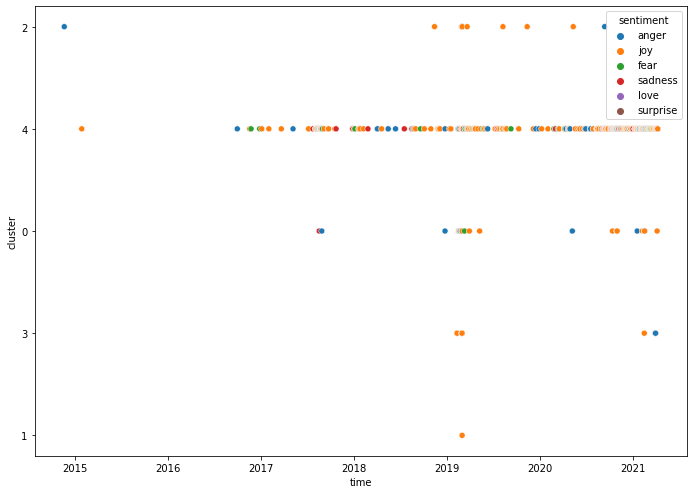

In [ ]:
import seaborn as sns #plot users
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.clear()
sns.scatterplot(data=df_new, x="time", y="cluster", hue="sentiment")